In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.2-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop2.7"
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.getOrCreate()

In [ ]:
spark.read.csv("Customer.csv", header=True).createOrReplaceTempView("customer")
spark.read.csv("DetailTransaction.csv", header=True).createOrReplaceTempView("detail")
spark.read.csv("HeaderTransaction.csv", header=True).createOrReplaceTempView("header")
spark.read.csv("Jacket.csv", header=True).createOrReplaceTempView("jacket")
spark.read.csv("JacketType.csv", header=True).createOrReplaceTempView("type")
spark.read.csv("Staff.csv", header=True).createOrReplaceTempView("staff")


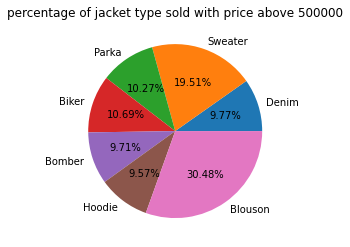

In [ ]:
#Show pie chart presenting percentage of jacket type sold with price above 500000, and add the jackettype for the label

data = spark.sql("""
  select j.jackettypeid, jackettypename, sum(quantity) as qty
  from type t
    join jacket j on j.jackettypeid = t.jackettypeid
    join detail d on d.jacketid = j.jacketid
  where price > 500000
  group by jackettypename, j.jackettypeid
""").toPandas()

plt.pie(data["qty"], labels=data["jackettypename"], autopct="%.2f%%")
plt.title("percentage of jacket type sold with price above 500000")
plt.show() 


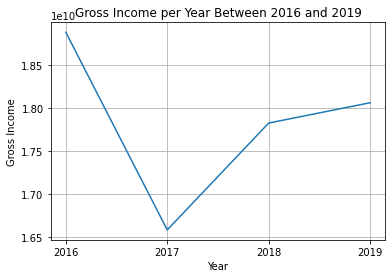

In [ ]:
#show plot diagram for gross income of the transaction oer year between 2016 and 2019
data=spark.sql("""
  select sum(price*quantity) as income, year(transactiondate) as year
  from header h
    join detail d on d.transactionid = h.transactionid
    join jacket j on j.jacketid = d.jacketid
  where year(h.transactiondate) between 2016 and 2019
  group by year(transactiondate)
  order by year
""").toPandas()

plt.plot(data["year"], data["income"])  
plt.xlabel("Year")		
plt.xticks([2016, 2017, 2018, 2019])
plt.ylabel("Gross Income")	
plt.title("Gross Income per Year Between 2016 and 2019")	
plt.grid()
plt.show()


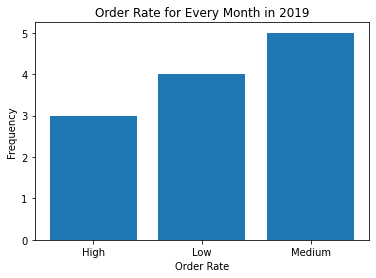

In [ ]:
#show bar diagram using rate and freq data in order to visualize order rate for every month in 2019
data=spark.sql("""
  select count(rate) as freq, rate
  from(
     select 
      case
        when sum(quantity) > 4000 then 'High'
        when sum(quantity) between 2500 and 4000 then 'Medium'
        when sum(quantity) <= 2500 then 'Low'
      end as rate
    from header h
      join detail d on h.transactionid = d.transactionid
    where year(transactiondate) = 2019
    group by month(transactiondate)
    order by rate
  )
  group by rate
""").toPandas()

plt.bar(data["rate"], data["freq"])
plt.title("Order Rate for Every Month in 2019")
plt.xlabel("Order Rate")
plt.ylabel("Frequency")
plt.show()
